In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
transform = transforms.ToTensor()

# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5), (0.5))
# ])
mnist_data = datasets.MNIST(root = './data', train = True, download=True, transform=transform)


In [38]:
mnist_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [39]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

In [40]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        #N, 784 - no of pixels in the dataset
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), #N, 784 -> N,128
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # -> N,3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid() 
        ) 
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Note: take care of the range of values of iamges at the last layer of the decoder.
    

In [7]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay = 1e-5)

In [8]:
num_epoches = 10
outputs=[]
for epoch in range(num_epoches):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch : {epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch : 1, Loss:0.0475
Epoch : 2, Loss:0.0420
Epoch : 3, Loss:0.0472
Epoch : 4, Loss:0.0394
Epoch : 5, Loss:0.0382
Epoch : 6, Loss:0.0433
Epoch : 7, Loss:0.0351
Epoch : 8, Loss:0.0357
Epoch : 9, Loss:0.0368
Epoch : 10, Loss:0.0306


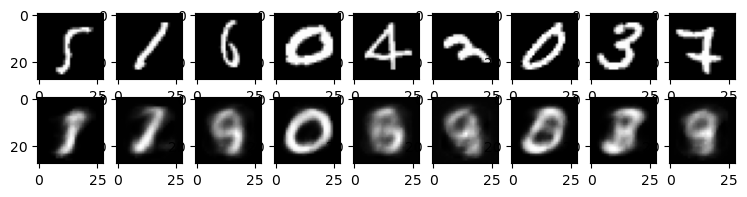

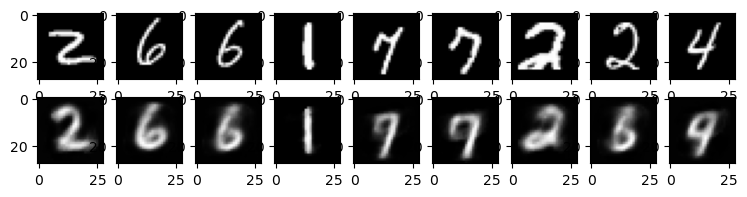

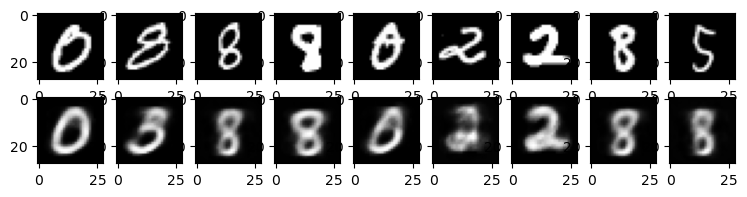

In [11]:
for k in range(0, num_epoches, 4):
    plt.figure(figsize= (9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, i+1+9)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

In [41]:
class Autoencoder_CNN(nn.Module):
    def __init__(self):
        #N, 1, 28,28 - no of pixels in the dataset
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), #N, 16,14,14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), #N, 32,7,7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7) #N, 64, 1, 1
        )
        
        # N, 64, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), #N, 32, 7,7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), #N, 16, 14, 14
            nn.ReLU(),
            nn.ConvTranspose2d(16,1, 3, stride=2, padding=1, output_padding=1), #N, 1, 28, 28
            nn.Sigmoid()
        ) 
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Note: take care of the range of values of iamges at the last layer of the decoder.

In [42]:
modelCNN = Autoencoder_CNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(modelCNN.parameters(), lr=1e-3, weight_decay = 1e-5)

In [45]:
num_epoches = 1
outputs_CNN=[]
for epoch in range(num_epoches):
    for (img, _) in data_loader:
        recon = modelCNN(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch : {epoch+1}, Loss:{loss.item():.4f}')
    outputs_CNN.append((epoch, img, recon))

Epoch : 1, Loss:nan


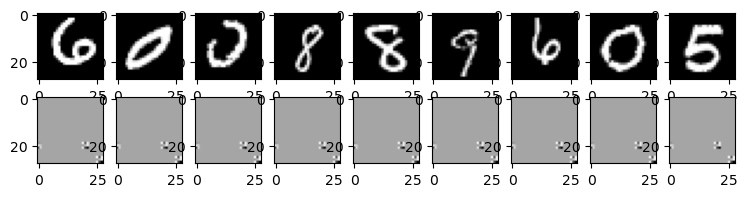

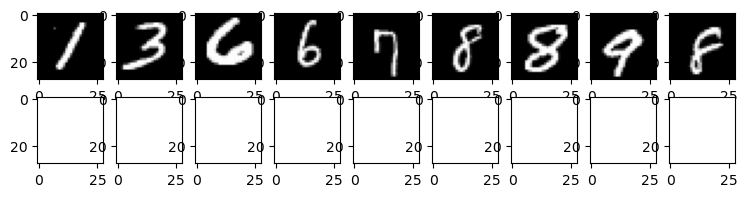

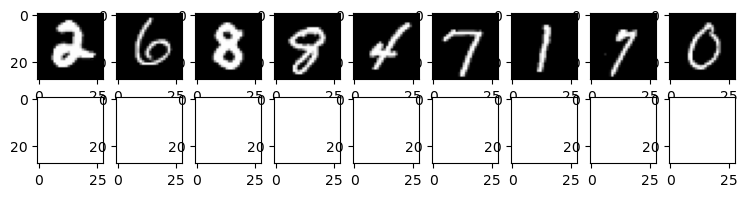

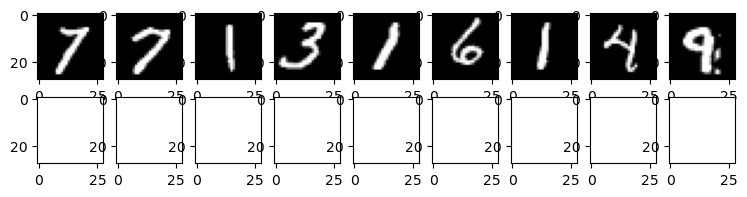

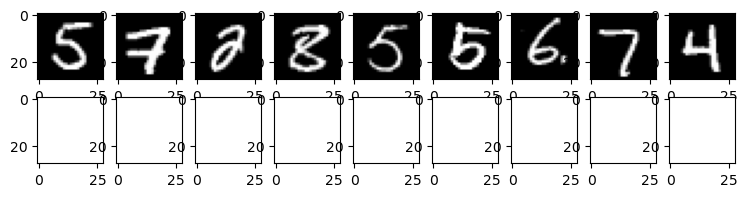

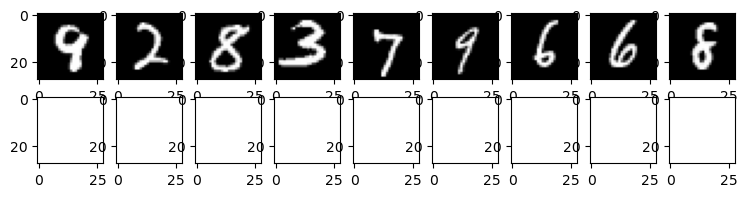

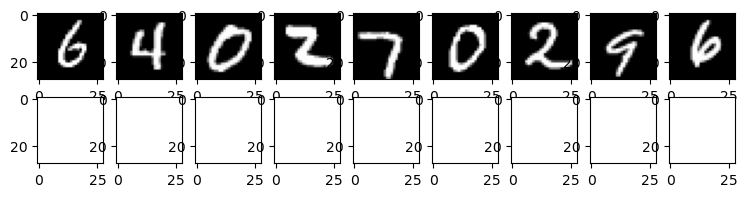

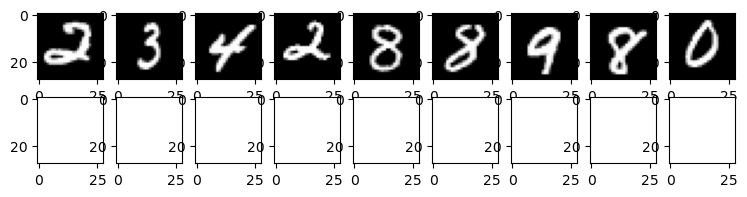

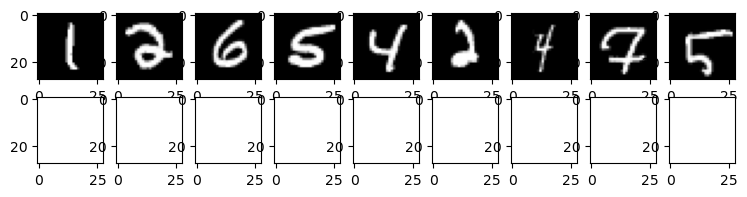

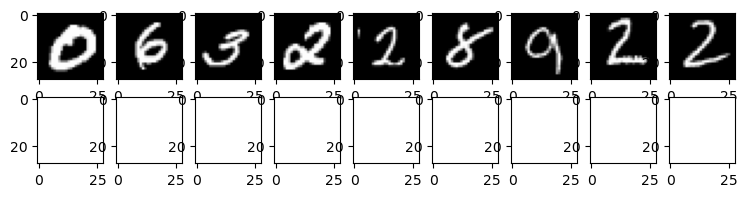

In [44]:
for k in range(0, num_epoches):
    plt.figure(figsize= (9,2))
    plt.gray()
    imgs = outputs_CNN[k][1].detach().numpy()
    recon = outputs_CNN[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, i+1+9)
        plt.imshow(item[0])